In [29]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%aimport caplib
from caplib import show, clusterize, load_random_img
import caplib

In [19]:
# import cv2
# from matplotlib import pyplot as plt
# import numpy as np
# from functools import partial
# from operator import is_not
# is_not_none = partial(is_not, None)

OpenCV Version : 3.1.0 


(175, 3)


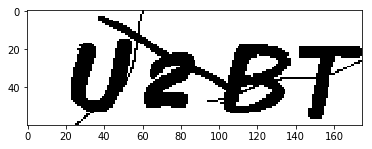

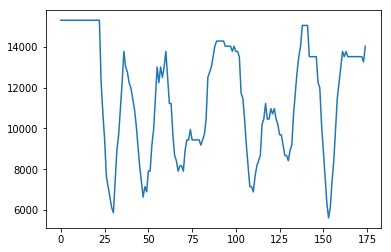

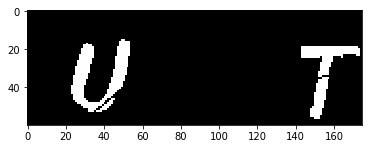

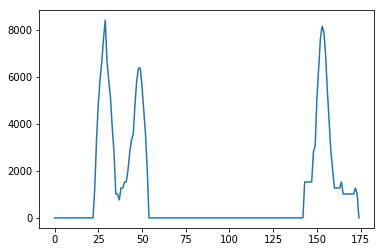

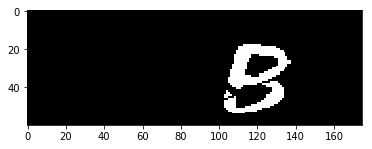

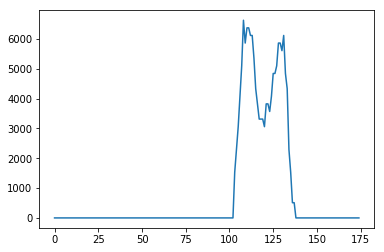

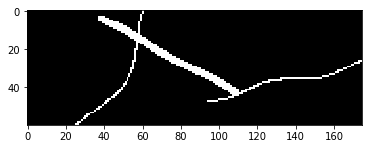

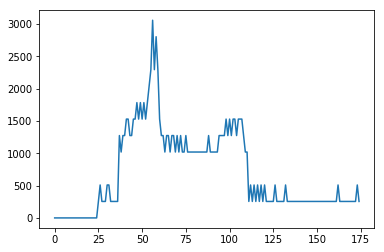

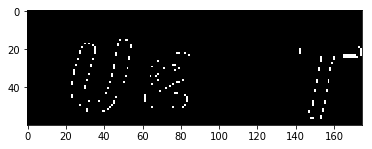

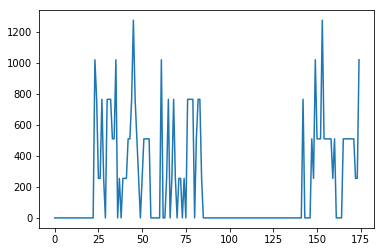

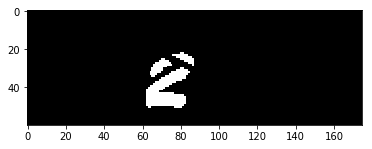

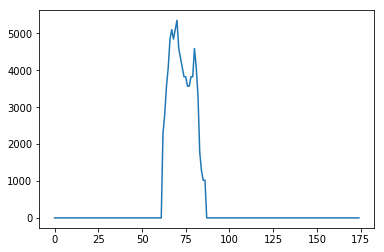

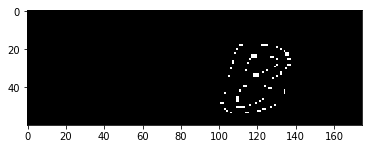

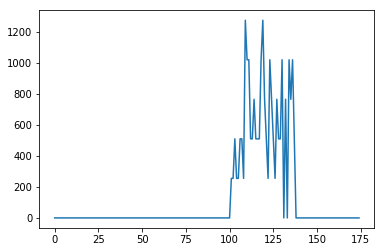

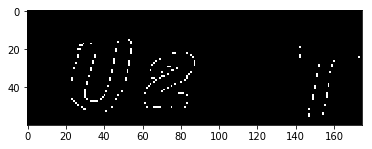

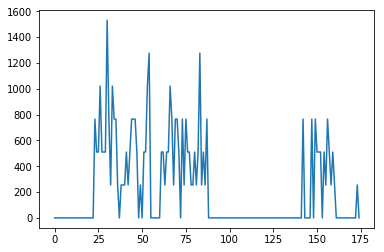

In [88]:
(fname,img) = load_random_img()

clusters = list(map(caplib.simple_bin, clusterize(img)))

for c in clusters:
    show(c)
    plt.plot(caplib.get_hist(c[:,:,1]))
    plt.show()

In [86]:
fname

7